In [5]:
import csv
import pandas as pd
import numpy as np

def read_csv(filename):
    with open(filename, 'r') as f:
        data = pd.read_csv(f)
        alpha =[float(value) for value in data.loc[::2, 'alpha']]
        print(len(alpha))
        fitness = [float(value) for value in data.loc[::2, 'fitness']]
        cost = [float(value) for value in data.loc[::2, 'cost']]
        rejected = [float(value) for value in data.loc[::2, 'rejected']]
        max_request = rejected[0]
        max_cost = 0
        for i in range(len(cost)):
            if cost[i] != 0:
                alpha_i = alpha[i]
                fitness_i = fitness[i]
                cost_i = cost[i]
                rejected_i = rejected[i]
                max_cost = (1 - alpha_i)*cost_i/(fitness_i - alpha_i* rejected_i/ max_request)
                break
        
        objective = []
        for i in range(len(cost)):
            objective.append([cost[i]/max_cost, rejected[i]/max_request])
        return objective, np.array(cost)/max_cost, np.array(rejected)/max_request


In [6]:
objective, cost, rejected = read_csv(r"Result_SingleObjective\nsf_rural_normal_s3.csv")

51


In [7]:
print(rejected)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.77147162 0.76996484 0.76996484
 0.73932697 0.7679558  0.74234053 0.7654445  0.73782019 0.51481668
 0.46007032 0.28779508 0.28227022 0.28779508 0.17980914 0.17327976
 0.19839277 0.14967353 0.12757408 0.13661477 0.11501758 0.13661477
 0.14163737 0.13259669 0.12908086 0.13761929 0.12405826 0.11752888
 0.13661477 0.11803114 0.11953792 0.11702662 0.1160221  0.1260673
 0.12255148 0.11551984 0.13209442]


In [8]:
from utils.utils import cal_hv
import numpy as np
print(len(objective))
print(cal_hv(np.array(objective), np.array([1,1,])))

51

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

0.5622876071763445


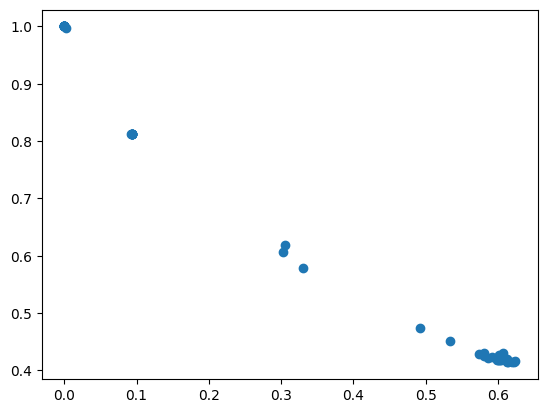

In [76]:
import matplotlib.pyplot as plt

plt.scatter(cost, rejected)